# Exploring Movie Industry Trends: Unveiling Patterns on the Big Screen
#### Prepared by Jose Carlos Moreno Ramirez
##### *Western Governors University,   Introduction to Data Science - C749,    Project: Investigate a Dataset*


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About this dataset 

Within this dataset is a massive sheet of information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The *tmdb-movies.csv* dataset contains the following 21 structured data columns:
1. *`id`*: Unique ID for each movie.
2. *`imdb_id:`* IMDB id for the movie.
3. *`popularity:`* A measure of the movie's popularity, often based on user engagement.
5. *`budget:`* The financial resources allocated for producing the movie.
6. *`revenue:`* The income generated by the movie from sources like ticket sales.
7. *`original_title:`* The title of the movie in its original language.
8. *`cast:`* Names of the actors and actresses who appeared in the movie.
9. *`homepage:`* URL to the official website or webpage related to the movie.
10. *`director:`* Name of the director who led the filmmaking process.
11. *`tagline:`* A memorable phrase or tagline associated with the movie's marketing.
12. *`keywords:`* Keywords or phrases used to describe the movie's themes or content.
13. *`overview:`* A brief summary of the movie's plot or storyline.
14. *`runtime:`* The duration of the movie in minutes.
15. *`genres:`* Categories or genres that describe the movie's style or theme.
16. *`production_companies:`* Names of production companies involved in making the movie.
17. *`release_date:`* The date when the movie was released.
18. *`vote_count:`* The number of user votes or ratings the movie has received.
19. *`vote_average:`* The average rating given to the movie by users.
20. *`release_year:`* The year when the movie was released.
21. *`budget_adj:`* Budget amount adjusted for inflation over time.
22. *`revenue_adj:`* Revenue amount adjusted for inflation over time.


### What data will we science?
>1. Which movie had the highest return on investment (ROI)?
  >>- *Objective: Calculate ROI as (Profit / Budget) and identify the movie with the highest ROI.*

>2. Are there any correlations between movie budget and revenue?
  >>- *Objective: Use correlation analysis to determine if there is a relationship between a movie's budget and its revenue.*
  
>3. What is the distribution of movie genres over the years?
  >>- *Objective: Analyze how the popularity of different genres has evolved over time.*

>4. Is there a relationship between movie runtime and user ratings?
  >>- *Objective: Investigate if longer or shorter movies tend to receive higher user ratings.*
  
>5. What are the top keywords associated with highly-rated movies?
  >>- *Objective: Identify keywords from the 'keywords' column that are most common among movies with high user ratings.*

>6. How has the average movie budget and revenue changed over the years?
  >>- *Objective: Use correlation analysis to determine if there is a relationship between a movie's budget and its revenue.*
  
>7. Which production companies have produced the most profitable movies?
  >>- *Objective: Identify production companies associated with the highest-profit movies.*

>8. What is the distribution of movie release months?
  >>- *Objective: Analyze which months have historically seen the most movie releases.*
  
>9. Which director has consistently delivered successful movies over their career?
  >>- *Objective: Identify directors with a track record of making profitable or highly-rated films.*

>10. What is the most common runtime for movies in different genres?
  >>- *Objective: Investigate whether there are typical runtime preferences within different genres.*

In [2]:
#  1. Importing the libraries necessary for this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  2. Enabling inline plotting.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Commencing **extraction** of the ETL phase.

### Loading the dataset:

In [53]:
#  1. Loading the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\Carlos\OneDrive - Western Governors University\WGU\Term 2\C749 - Introduction to Data Science\Final Project - Investigate a Data Set\tmdb-movies.csv")

#  2. Reviewing results
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


>Output shows the DataFrame's columns and first three records indicating a successful connection.

### Now, let's explore this data and see what we're working with:

In [54]:
#  1. Extracting basic information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [55]:
#  1. Extracting information that describes the dataset using statistics (this command is too cool)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Output shows descriptive statistics about the dataset.

>Note the columns with '0' value. These may need to be thought about later.

### How many years of movie data are we analyzing?

In [83]:
#  1. Changing variables to datetime format
df['release_date']=pd.to_datetime(df['release_date'])

In [84]:
#  1. Identifying the min and max dates in this dataset
min_date = df['release_date'].min()
max_date = df['release_date'].max()

#  2. Calculating the date range in years
date_range_years = (max_date - min_date).days / 365.25  # Dividing by 365.25 to account for leap years

#  3. Reviewing results
print(f"The dataset covers a date range of {date_range_years:.2f} years, from {min_date} to {max_date}.")

The dataset covers a date range of 55.54 years, from 1960-06-15 00:00:00 to 2015-12-30 00:00:00.


> Output shows that our dataset will require the analysis of 55 years worth of movie data beginning from 1960 - 2015!

### Resolve Common Dataset Issues:

In [58]:
#  1. Counting all null values.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>Output shows which columns have data and which don't.

In [59]:
#  1. Checking for how many unique values we have.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> Output shows how many different values we can analyze.

In [60]:
#  1. Discovered the dataset has null values, so let's check for duplicates!
df.duplicated().sum()

1

>Aha! We got one..great.

## Data Wrangling Observations:
* 21 columns total, but we probably won't need all of them - so we'll drop as needed.
* Some columns contain null data - so we'll need to either drop it or insert a value of 0.
* There is one duplicate - this will be dropped.
* Several columns contain delimeters - these may or may not need to be addressed.
* In order to calculate ROI as (Profit/Budget) a new column will need to be created.

<a id='cleaning'></a>
## Data Cleaning

Commencing **transforming** of the ETL phase.

In [61]:
#  1. Dropping columns we won't need.
df.drop(['imdb_id','homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

#  2. Reviewing changes.
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


> Output shows the columns we'll be working with.

In [62]:
#  1. Dropping duplicate data.
df.drop_duplicates(inplace=True)

#  2. Reviewing results.
df.duplicated().sum()

0

In [63]:
#  1. Removing values equal to 0 belonging to the budget or revenue fields.
rows_to_check = ['budget', 'revenue']

df[rows_to_check] = df[rows_to_check].replace(0, np.NaN) # replaces values of 0 with NaN inside the given rows we've chosen.

df.dropna(subset = rows_to_check, inplace=True) # drops rows with the value of NaN inside the given rows we've chosen.

rows, col = df.shape
print('Total movies: {}'.format(rows-1))

Total movies: 3853


> Output shows the new collection of movies we'll be working with in the dataset. We went from `10,000` to `3,853`.

In [64]:
#  1. Next, let's calculate ROI in a few steps.

#  2. Creating a new column, `profit` by subtracting budget from revenue. 
df['profit'] = df['revenue'] - df['budget']

#  3. Now, let's create an ROI column by diving profit by budget.
df['roi'] = df['profit'] / df['budget']

#  4. Reviewing results.
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,roi
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09,9.090192
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08,1.522909
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08,1.683984


In [65]:
#  1. Converting `release_date` to a datetime data type so it'll be easier to extract the month and year for later analysis.
df['release_date'] = pd.to_datetime(df['release_date'])

#  2. Extracting the month component and making a new column to hold the values.
df['release_month'] = df['release_date'].dt.month

#  3. Extracting the year component and making a new column to hold the values.
#df['release_year'] = df['release_date'].dt.year

#  4. Reviewing results.
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,roi,release_month
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09,9.090192,6
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08,1.522909,5
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08,1.683984,3


> Output looks good, but to improve the interpretability of this column let's name the values in the `release_month` column according to their respective months.

In [66]:
#  1. Creating a dictionary to map numeric values to month names.
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

#  2. Now that this has been established, let's use the map function to make the swaps.
df['release_month'] = df['release_month'].map(month_names)

#  3. Reviewing results.
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,roi,release_month
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09,9.090192,June
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08,1.522909,May
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08,1.683984,March


> Output looks much better. This makes it easier to understand and interpret the results when analyzing the distribution of movie release months. Moving on!

In [68]:
#  1. Let's reorganize the columns so it's easier to look at.

#  2. Moving `original_title` column to column 2
column_2 = df.pop('original_title')
df.insert(1, 'original_title', column_2)

#  3. Moving `release_month` to column 15
column_15 = df.pop('release_month')
df.insert(13, 'release_month', column_15)

#  4. Moving `release_year` to column 16
column_16 = df.pop('release_year')
df.insert(14, 'release_year', column_16)

#  5. Moving `roi` to column 6
column_6 = df.pop('roi')
df.insert(5, 'roi', column_6)

#  6. Reviewing results
df.head(3)

,id,original_title,popularity,budget,revenue,roi,cast,director,keywords,runtime,genres,production_companies,release_date,release_month,release_year,vote_count,vote_average,profit
0,135397,Jurassic World,32.985763,150000000.0,1.513529e+09,9.090192,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,June,2015,5562,6.5,1.363529e+09
1,76341,Mad Max: Fury Road,28.419936,150000000.0,3.784364e+08,1.522909,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,May,2015,6185,7.1,2.284364e+08
2,262500,Insurgent,13.112507,110000000.0,2.952382e+08,1.683984,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,March,2015,2480,6.3,1.852382e+08


> Output looks good, let's keep on rolling!

In [69]:
#  1. Checking if the `runtime` field has values of 0 and replacing with NaN.
df['runtime'] = df['runtime'].replace(0, np.NaN)

#  2. Checking if we need to modify anymore field data types.
df.dtypes

id                               int64
original_title                  object
popularity                     float64
budget                         float64
revenue                        float64
roi                            float64
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_month                   object
release_year                     int64
vote_count                       int64
vote_average                   float64
profit                         float64
dtype: object

> I think right now, we've made sufficient changes to begin EDA. If not, we will make the necessary adjustments as they come up. 

<a id='eda'></a>
## Exploratory Data Analysis

Time to see some cool visuals and bring these numbers to life!

## *Research Question 1: Which movie had the highest return on investment (ROI)?*
#### Objective: Calculate ROI as (Profit / Budget) and identify the movie with the highest ROI.

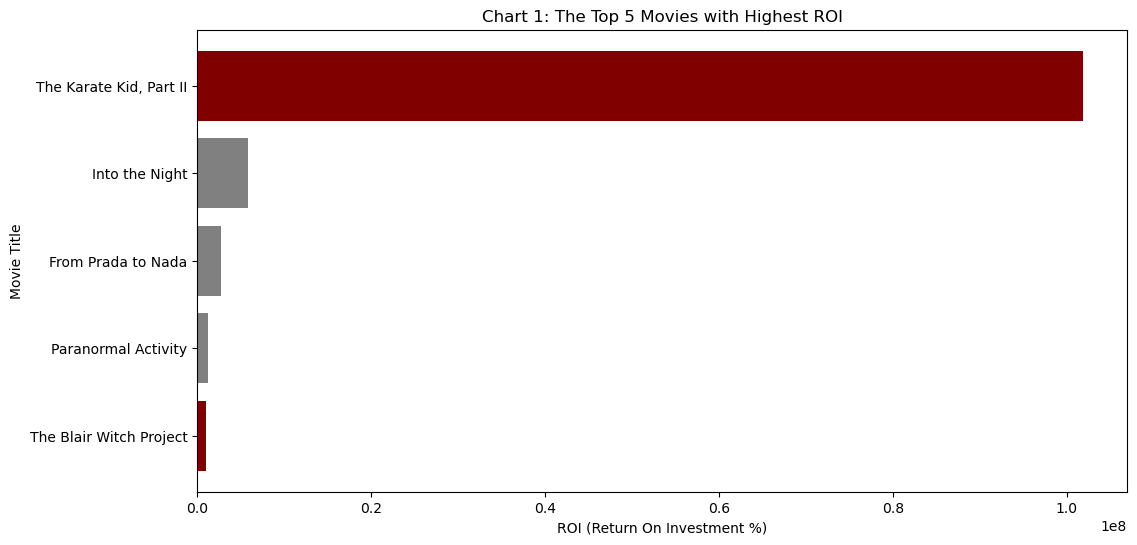


        ----------
        Chart 1/10
        ----------
    In this bar chart:
    ---> The y-axis represents the movie names.
    ---> The x-axis represents the return on investment calculated as a percent.
    ---> The top 10 movies with the highest return on investment are identified!
    
    Prepared by Jose Carlos Moreno Ramirez



In [71]:
#  1. Sorting the DF to show `roi` in descending order.
df_sorted_by_roi = df.sort_values(by='roi', ascending=False)

#  2. Showing the top 15 movies with the highest ROI.
top_10_movies = df_sorted_by_roi.head(5)

#  3. Setting colors for bars
colors = ['maroon' if movie == top_10_movies['original_title'].iloc[0] or movie == top_10_movies['original_title'].iloc[-1] else 'grey' for movie in top_10_movies['original_title']]

plt.figure(figsize=(12, 6))  # Setting the figure size
plt.barh(top_10_movies['original_title'], top_10_movies['roi'] * 100, color=colors)  # Converting decimal ROI to percentage
plt.xlabel('ROI (Return On Investment %)')  # Updating x-label to indicate percentage
plt.ylabel('Movie Title')
plt.title('Chart 1: The Top 5 Movies with Highest ROI')
plt.gca().invert_yaxis()  # Inverting the y-axis to display the highest ROI at the top
plt.show()

#  4. Brief explanation
print('''
        ----------
        Chart 1/10
        ----------
    In this bar chart:
    ---> The y-axis represents the movie names.
    ---> The x-axis represents the return on investment calculated as a percent.
    ---> The top 10 movies with the highest return on investment are identified!
    
    Prepared by Jose Carlos Moreno Ramirez
''')


#### What the data shows:
> As weird as it might sound, apparently `The Karate Kid, Part 2` made the most money back after spending who knows how much to produce it! 

> The difference between 1st and 2nd place is substantial.

> Maybe I need to go back and rewatch this movie to see what the hype was about!

## *Research Question 2: Are there any correlations between movie budget and revenue?*
#### Objective: Use correlation analysis to determine if there is a relationship between a movie's budget and its revenue. 

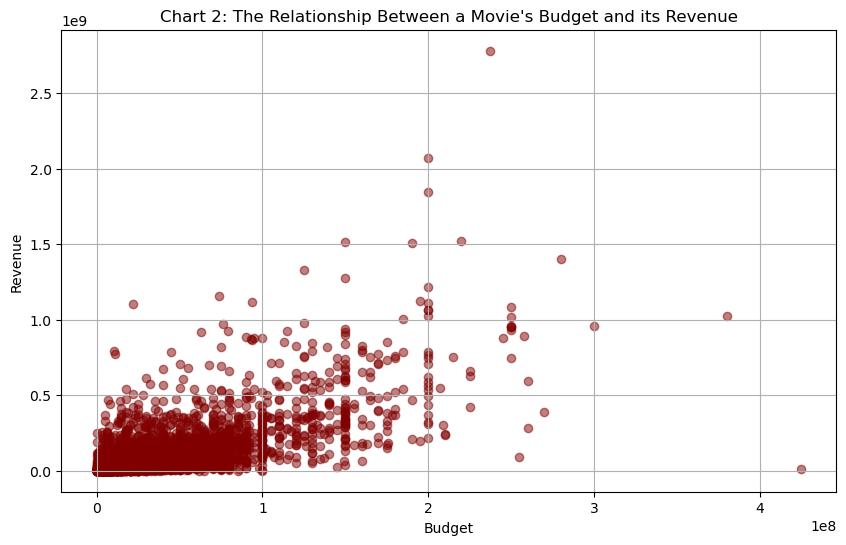


      ----------
      Chart 2/10
      ----------
      
In this scatter plot:
The correlation coefficient between the budget and revenue is: 0.69.
Each circle is a movie.
The x-axis represents the budget of a movie.
The y-axis represents the revenue a movie generated.

Prepared by Jose Carlos Moreno Ramirez


In [72]:
#  1. Developing a scatter plot to visualize the relationship (if any) between `revenue` and `budget`.
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(df['budget'], df['revenue'], alpha=0.5, color='maroon')  # Pro tip: alpha adds transparency for better visualization
plt.xlabel('Budget') 
plt.ylabel('Revenue')
plt.title("Chart 2: The Relationship Between a Movie's Budget and its Revenue")
plt.grid(True)  # Adding gridlines for better reference
plt.show()

#  2. Calculating the correlation coefficient between 'budget' and 'revenue'
correlation = df['budget'].corr(df['revenue'])


#  3. Brief Explanation
print('''
      ----------
      Chart 2/10
      ----------
      ''')
print(f"In this scatter plot:\nThe correlation coefficient between the budget and revenue is: {correlation:.2f}.\nEach circle is a movie.\nThe x-axis represents the budget of a movie.\nThe y-axis represents the revenue a movie generated.")
print(f"\nPrepared by Jose Carlos Moreno Ramirez")

> *Note: According to Oxford Languages: Pearson's correlation coefficient is a statistic measuring the linear interdependence between two variables or two sets of data.*

#### What the data shows:
> It appears that most data points are clustered in the low budget and low revenue region.

> Notice there are multiple outliers which indicates that, despite high budget, some movies made a lot of money in return.

> The relationship trend appears to be positive, albeit it's pretty weak, which tells us that on average the more a movie costs to make the more revenue it's likely to generate.

> I expected to see a strong or linear correlation, but if we really think about it there are many things that influence a movie's revenue and budget is only one component. 

## *Research Question 3: What is the distribution of movie genres over the years?*
#### Objective: Analyze how the popularity of different genres has evolved over time.

> Since our `genres` column contains many values seperated by a delimiter, we will need to split the data.

In [73]:
#  1. Splitting the 'genres' column into a list of genre categories.
df['genres'] = df['genres'].str.split('|')

#  2. Using the explode() function to create individual rows for each genre.
df = df.explode('genres')

#  3. Reviewing changes.
df.dtypes

id                               int64
original_title                  object
popularity                     float64
budget                         float64
revenue                        float64
roi                            float64
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_month                   object
release_year                     int64
vote_count                       int64
vote_average                   float64
profit                         float64
dtype: object

> Output shows that we've successfully split the values within the `genre` category that were grouped within the same observation separated by the `|` delimiter.

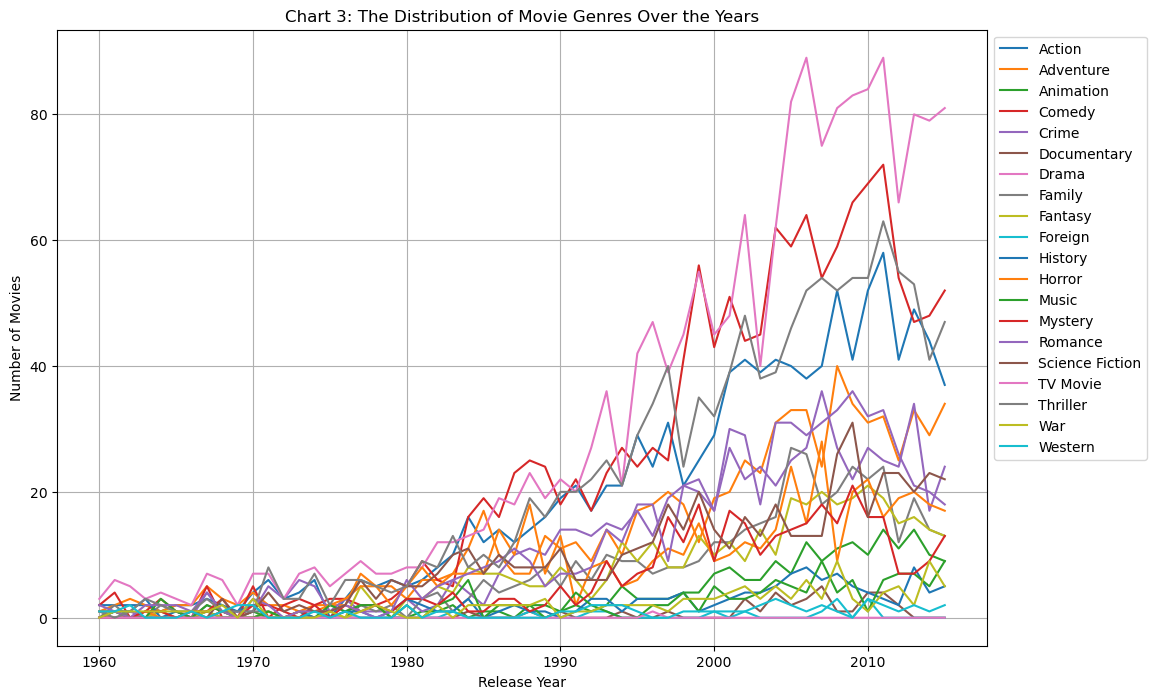


        ----------
        Chart 3/10
        ----------
    In this line chart:
    ---> Each line represents a genre category.
    ---> The y-axis represents number of movies.
    ---> The x-axis represents the release year.
    ---> The typical runtime patterns for different genres are identified!    
    Prepared by Jose Carlos Moreno Ramirez



In [74]:
# 4. First things first, we need to group by `release_year` and `genres` to count the total movies in each year.
genre_year_counts = df.groupby(['release_year', 'genres']).size().unstack(fill_value=0)

# 5. Creating a line chart to visualize the genre distributions over the years
plt.figure(figsize=(12, 8))  # Setting the figure size
for genre in genre_year_counts.columns:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Chart 3: The Distribution of Movie Genres Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adding a legend outside the plot for clarity
plt.grid(True)  # Adding gridlines for better reference
plt.show()

#  6. Brief explanation
print('''
        ----------
        Chart 3/10
        ----------
    In this line chart:
    ---> Each line represents a genre category.
    ---> The y-axis represents number of movies.
    ---> The x-axis represents the release year.
    ---> The typical runtime patterns for different genres are identified!    
    Prepared by Jose Carlos Moreno Ramirez
''')

#### Conclusions:
> It's interesting to note that in the 1960's - 1975ish there wasn't much preference over what genre movie to watch.

> The `Drama` genre dominates the movie preference over the years with `Comedy` in second and `Family` in third.

> It appears that decade over decade the amount of movie releases doubled.

> `Western` movies continue to see the least amount of preference over 50 years.

## *Research Question 4: Is there a relationship between movie runtime and user ratings?*
#### Objective: Investigate if longer or shorter movies tend to receive higher user ratings.

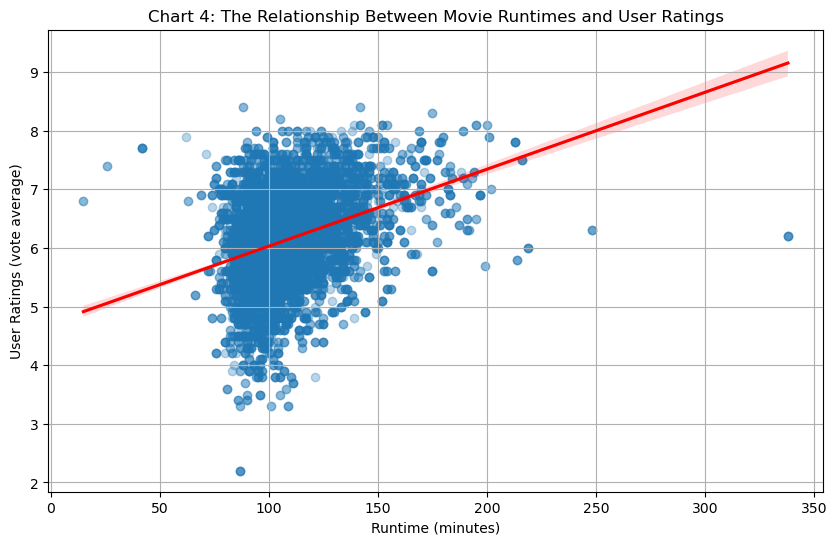


        ----------
        Chart 4/10
        ----------
    In this scatter plot:
    ---> The y-axis represents user ratings (vote_average).
    ---> The x-axis represents the movie runtime in minutes.
    ---> Each point in the scatter plot represents a movie.
    ---> The red regression line shows the trend in the relationship between runtime and user ratings.
    ---> The relationship between movies and user ratings is identified!    
    Prepared by Jose Carlos Moreno Ramirez



In [75]:
#  1. Developing a scatter plot to visualize the relationship between 'runtime' and 'vote_average'
plt.figure(figsize=(10, 6))  # setting the figure size

#  2. Using Seaborn library to create the scatter plot with regression line
sns.regplot(x='runtime', y='vote_average', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})

plt.xlabel('Runtime (minutes)')
plt.ylabel('User Ratings (vote average)')
plt.title('Chart 4: The Relationship Between Movie Runtimes and User Ratings')
plt.grid(True)  # adding gridlines for better reference
plt.show()

#  3. Brief explanation.
print('''
        ----------
        Chart 4/10
        ----------
    In this scatter plot:
    ---> The y-axis represents user ratings (vote_average).
    ---> The x-axis represents the movie runtime in minutes.
    ---> Each point in the scatter plot represents a movie.
    ---> The red regression line shows the trend in the relationship between runtime and user ratings.
    ---> The relationship between movies and user ratings is identified!    
    Prepared by Jose Carlos Moreno Ramirez
''')

#### Conclusions:
> The red regression line is positive indicating that longer movies tend to have better user ratings.

> The greater majority of movies is heavily concentrated within the 50 - 200 runtime indicating a sweet spot for movie length and positive user ratings.

> In other words, shorter movies receive higher user ratings.

## *Research Question 5: What are the top keywords associated with highly-rated movies?*
#### Objective: Identify keywords from the 'keywords' column that are most common among movies with high user ratings.

> In order to identify the most common keywords, they will need to be extracted and processed first.

In [76]:
from collections import Counter

#  1. Extracting keywords and a count of each time it's used.
keywords = df['keywords'].str.split('|').explode().str.strip()  # spliting -->  exploding --> and cleaning keywords
keyword_counts = keywords.value_counts()

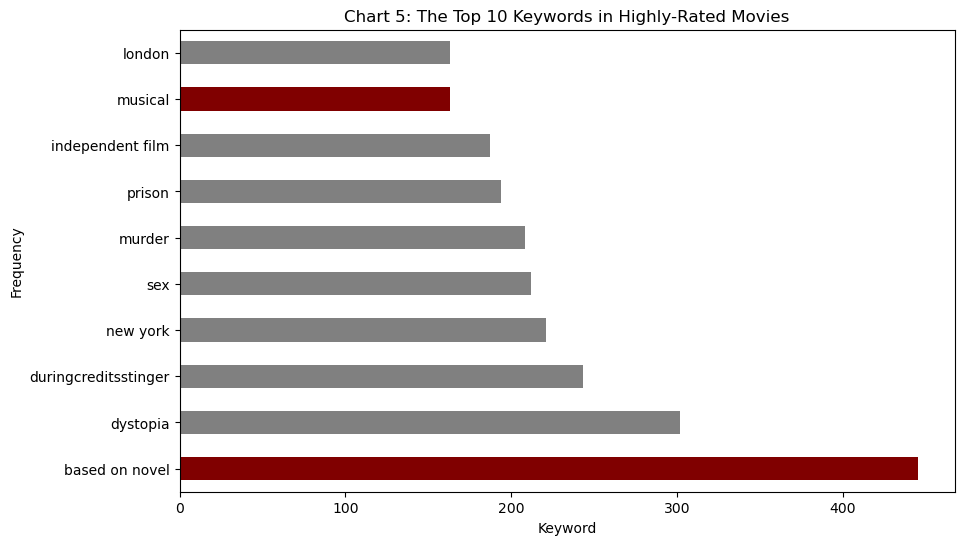


        ----------
        Chart 5/10
        ----------
    In this bar chart:
    ---> The y-axis represents the frequency of each keyword.
    ---> The x-axis represents keywords.
    ---> The top 10 keywords are displayed.
    ---> The keywords associated with the most highly rated movies are identified!    
   
   Prepared by Jose Carlos Moreno Ramirez



In [82]:
#  2. Developing a bar chart to display the most common keywords
top_keywords = keyword_counts.head(10)  # displaying the top 10 keywords

# 3. Setting colors for bars
colors = ['maroon' if keyword == top_keywords.idxmin() or keyword == top_keywords.idxmax() else 'grey' for keyword in top_keywords.index]

plt.figure(figsize=(10, 6))  # setting the figure size
top_keywords.plot(kind='barh', color=colors)  # Apply colors to bars

plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Chart 5: The Top 10 Keywords in Highly-Rated Movies')
plt.show()

#  3. Brief explanation.
print('''
        ----------
        Chart 5/10
        ----------
    In this bar chart:
    ---> The y-axis represents the frequency of each keyword.
    ---> The x-axis represents keywords.
    ---> The top 10 keywords are displayed.
    ---> The keywords associated with the most highly rated movies are identified!    
   
   Prepared by Jose Carlos Moreno Ramirez
''')


#### Conclusions:
> I don't think anyone would've expected to see `independent film` as the most frequent keyword.

> Chances are that if you were to produce a movie with a `woman director` it would receive a lot more feedback!

> Movies based on novels is a lightly tapped market that could potentially result in positive gains.

## *Research Question 6: How has the average movie budget and revenue changed over the years?*
#### Objective: Use correlation analysis to determine if there is a relationship between a movie's budget and its revenue.

In [78]:
#  1. Grouping data by `release_year` for calculations.
average_budget_by_year = df.groupby('release_year')['budget'].mean()

#  2. Now, calculating the average (mean) budget and revenue.
average_revenue_by_year = df.groupby('release_year')['revenue'].mean()

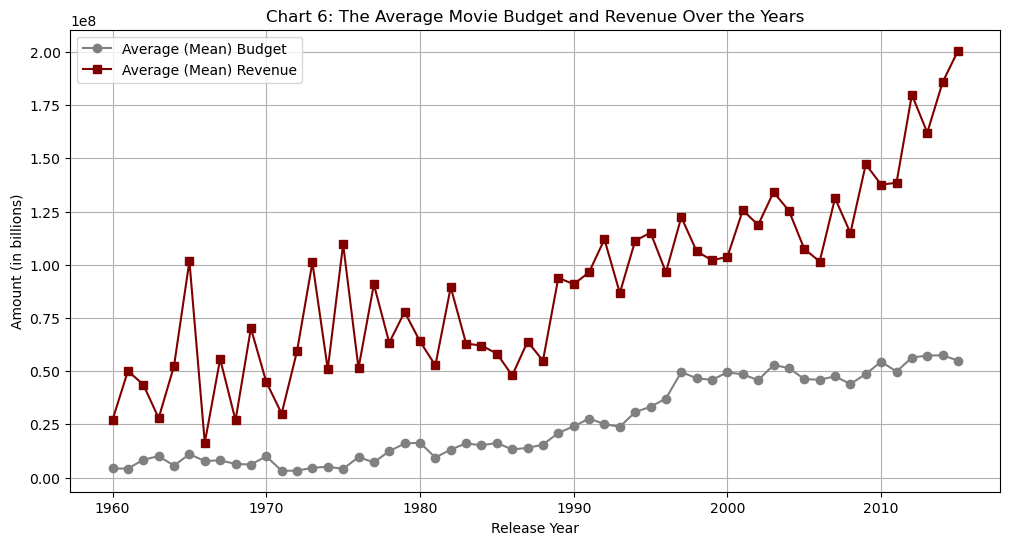


        ----------
        Chart 6/10
        ----------
    In this line chart:
    ---> The left y-axis represents the average budget, and the right y-axis the average revenue.
    ---> The x-axis represents the release year.
    ---> Each point on the line chart represents the average budget and revenue for a specific year.
    ---> The average cost of making a movie and its revenue are identified!    
   
   Prepared by Jose Carlos Moreno Ramirez



In [79]:
#  3. Developing a line chart that shows average budget over the years.

plt.figure(figsize=(12, 6)) # setting the figure size
plt.plot(average_budget_by_year.index, average_budget_by_year, label='Average (Mean) Budget', color='grey', marker='o')
plt.plot(average_revenue_by_year.index, average_revenue_by_year, label='Average (Mean) Revenue', color='maroon', marker='s')

plt.xlabel('Release Year')
plt.ylabel('Amount (in billions)')
plt.title('Chart 6: The Average Movie Budget and Revenue Over the Years')
plt.legend()
plt.grid(True)  # adding gridlines for better reference
plt.show()

#  4. Brief explanation:
print('''
        ----------
        Chart 6/10
        ----------
    In this line chart:
    ---> The left y-axis represents the average budget, and the right y-axis the average revenue.
    ---> The x-axis represents the release year.
    ---> Each point on the line chart represents the average budget and revenue for a specific year.
    ---> The average cost of making a movie and its revenue are identified!    
   
   Prepared by Jose Carlos Moreno Ramirez
''')

#### Conclusions:
> Notice that the cost to produce a movie was significantly less at the beginning of this trend than at the end.

> The average budget increases slightly over the years while it's revenue shows an increase as well, suggesting that the higher the movie budget the higher its revenue will likely be.

> The average budget and revenue increase together, suggesting overall growth in the movie industry.

> Similarily, the average budget and revenue decline together, most likely suggesting bad luck, challenges, or changes in the industry.

## *Research Question 7: Which production companies have produced the most profitable movies?*
#### Objective: Identify production companies associated with the highest-profit movies.

In [655]:
#  1. Grouping the data first, then calculating the total profit.
production_profit = df.groupby('production_companies')['profit'].sum()

#  2. Sorting the data to find the top production companies!
top_production_companies = production_profit.nlargest(10)

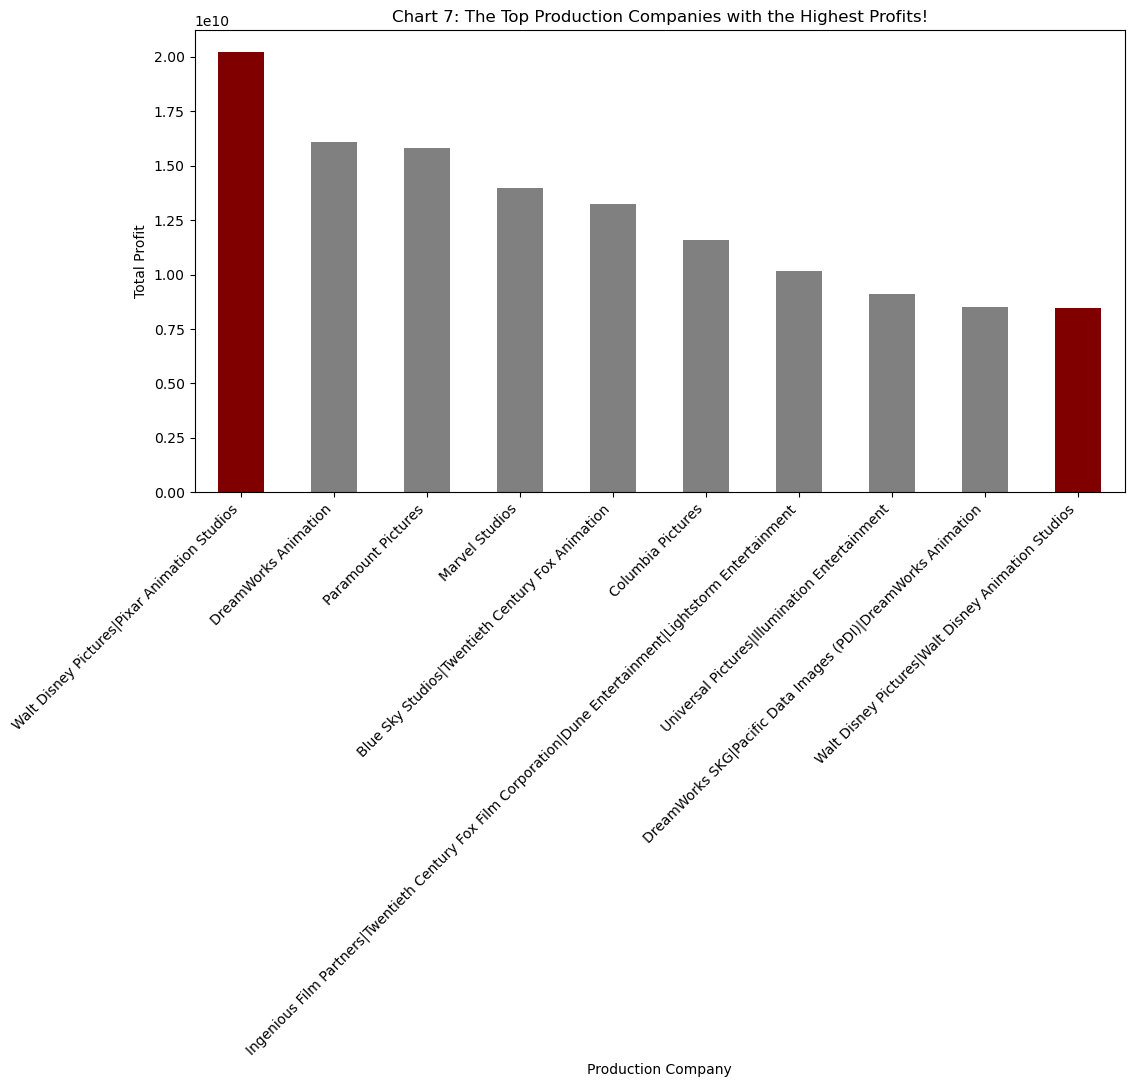


        ----------
        Chart 7/10
        ----------
    In this bar chart:
    ---> The x-axis represents the production companies.
    ---> The y-axis represents the total profit associated with each production company.
    ---> The top 10 production companies with the highest profits are identified.
    
    Prepared by Jose Carlos Moreno Ramirez



In [656]:
#  3. The `production_companies` rows contain multiple values separated by the `|` delimiter. Let's resolve this.
df['production_companies'] = df["production_companies"].str.split('|')
df = df.explode('production_companies')

#  4. Setting colors for bars (maroon for the highest, grey for others)
colors = ['maroon' if company in [top_production_companies.index[0], top_production_companies.index[-1]] else 'grey' for company in top_production_companies.index]

#  5. Developing a bar chart that shows the top 10 production companies with the most profit.
plt.figure(figsize=(12, 6))  # setting the figure size
top_production_companies.plot(kind='bar', color=colors)

plt.xlabel('Production Company')
plt.ylabel('Total Profit')
plt.title('Chart 7: The Top Production Companies with the Highest Profits!')
plt.xticks(rotation=45, ha='right') # rotating the x-axis labels so you can read it better
plt.show()

#  6. Brief explanation:
print('''
        ----------
        Chart 7/10
        ----------
    In this bar chart:
    ---> The x-axis represents the production companies.
    ---> The y-axis represents the total profit associated with each production company.
    ---> The top 10 production companies with the highest profits are identified.
    
    Prepared by Jose Carlos Moreno Ramirez
''')


## *Research Question 8: What is the distribution of movie release months?*
#### Objective: Analyze which months have historically seen the most movie releases.

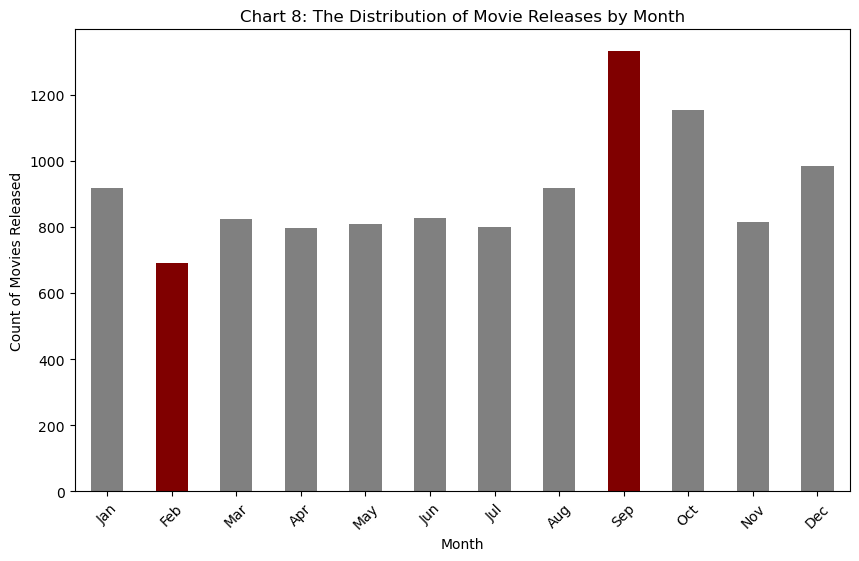


        ----------
        Chart 8/10
        ----------
    In this bar chart:
    ---> The x-axis represents the month.
    ---> The y-axis represents the total count of movies released that month.
    ---> The month(s) with the highest and lowest count of movie releases are identified!
    
    Prepared by Jose Carlos Moreno Ramirez



In [16]:
#  1. Converting the 'release_date' variable to datetime format with error handling, because you never know.
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#  2. Extracting the month from the 'release_date' column.
df['release_month'] = df['release_date'].dt.month

#  3. Developing a bar chart for visual analysis!
plt.figure(figsize=(10, 6))  #setting the figure size

#  4. Let's gather some statistics.
monthly_movie_counts = df.groupby('release_month').size()
min_count = monthly_movie_counts.min()
max_count = monthly_movie_counts.max()

#  5. Creating a list of colors based on conditions.
colors = ['maroon' if count == min_count or count == max_count else 'grey' for count in monthly_movie_counts]

#  6. Create the bar chart with conditional colors
monthly_movie_counts.plot(kind='bar', color=colors)

#  7. Adding labels and titles
plt.xlabel('Month')
plt.ylabel('Count of Movies Released')
plt.title('Chart 8: The Distribution of Movie Releases by Month')

#  8. Customizing x-axis labels to display month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0, 12), month_names, rotation=45)

plt.show()

#  9. Brief explanation:
print('''
        ----------
        Chart 8/10
        ----------
    In this bar chart:
    ---> The x-axis represents the month.
    ---> The y-axis represents the total count of movies released that month.
    ---> The month(s) with the highest and lowest count of movie releases are identified!
    
    Prepared by Jose Carlos Moreno Ramirez
''')

#### Conclusions:
> January saw the lowest amount of movie release.

> September saw the highest amount of movie release! I wonder why that could be?

> While the trend is slight, you can notice that it seems more movies get released month over month.

> December came in second place, which I what I initially guessed was the most popular month for movie releases.

## *Research Question 9: Which director has consistently delivered successful movies over their career?*
#### Objective: Identify directors with a track record of making profitable or highly-rated films.

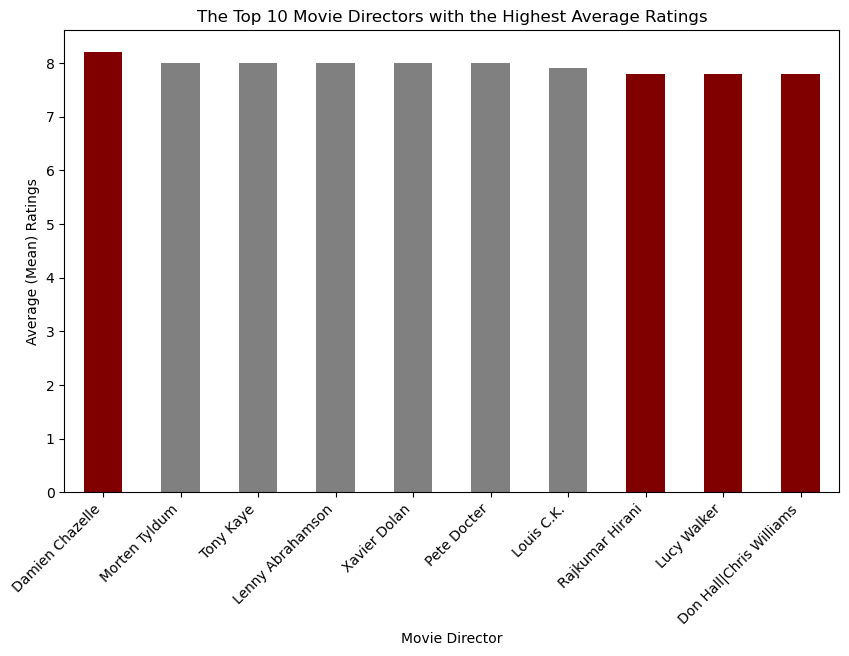


        ----------
        Chart 9/10
        ----------
    In this horizontal bar chart:
    ---> The x-axis represents the movie directors.
    ---> The y-axis represents the average ratings.
    ---> The directors with the most successful directing careers are identified!
    
    Prepared by Jose Carlos Moreno Ramirez



In [658]:
#  1. Calculating the average ratings for directors.
director_avg_ratings = df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)

#  2. Let's gather some statistics.
min_count = director_avg_ratings.min()
max_count = director_avg_ratings.max()

#  3. Creating a list of colors based on conditions using min_count and max_count.
colors = ['maroon' if count == min_count or count == max_count else 'grey' for count in director_avg_ratings]

#  4. Create the bar chart with conditional colors
plt.figure(figsize=(10, 6))
director_avg_ratings.plot(kind='bar', color=colors)  # Use the 'colors' variable here

plt.xlabel('Movie Director')
plt.ylabel('Average (Mean) Ratings')
plt.title('The Top 10 Movie Directors with the Highest Average Ratings')
plt.xticks(rotation=45, ha='right')

plt.show()

#  5. Brief explanation
print('''
        ----------
        Chart 9/10
        ----------
    In this horizontal bar chart:
    ---> The x-axis represents the movie directors.
    ---> The y-axis represents the average ratings.
    ---> The directors with the most successful directing careers are identified!
    
    Prepared by Jose Carlos Moreno Ramirez
''')


#### Conclusions:
> Over half of these movie directors received an average rating of 8 or higher.

> I only recognize one name up here.

> Don Hall and Chris Williams appear to be in a draw.

> These movie directors have delivered the most successful movies during their careers.

## *Research Question 10: What is the most common runtime for movies in different genres?*
#### Objective: Calculate ROI as (Profit / Budget) and identify the movie with the highest ROI.

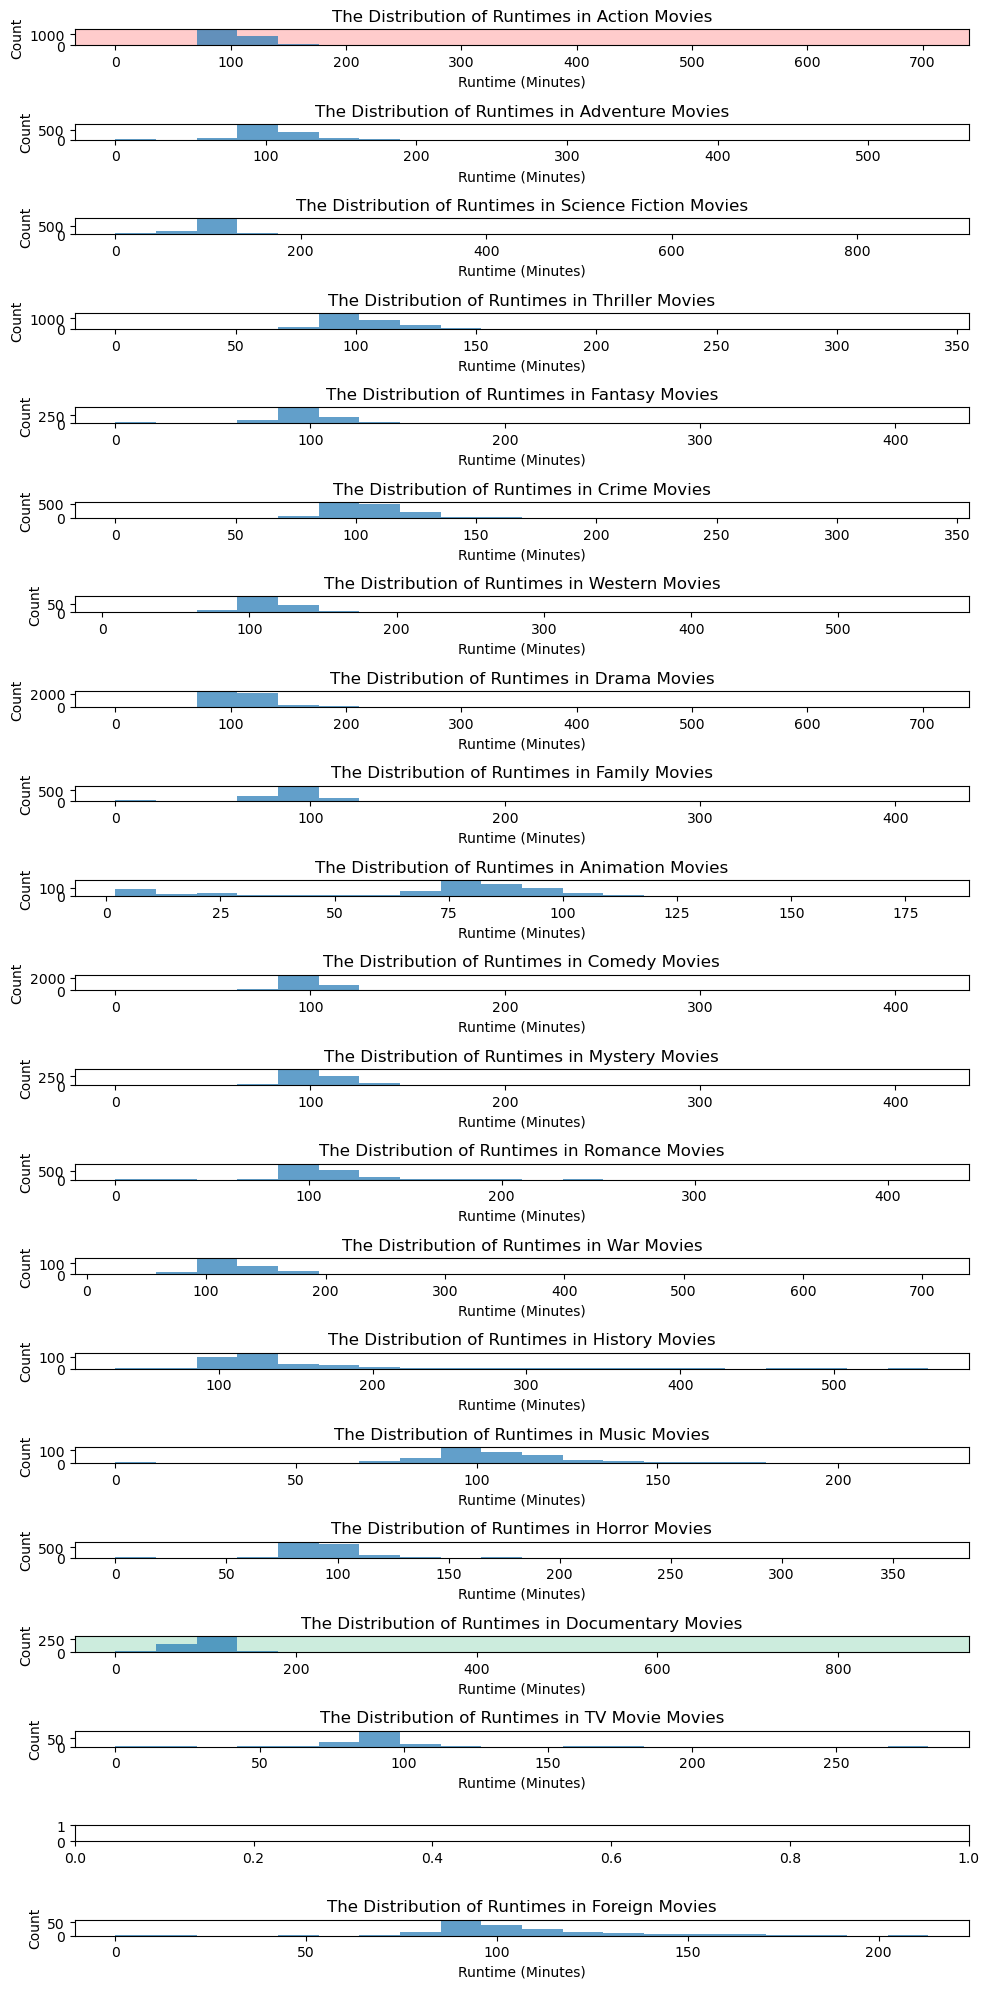


        -----------
        Chart 10/10
        -----------
    In these histogram charts:
    ---> The y-axis represents the frequency (how many movies fall into each runtime interval).
    ---> The x-axis represents the different movie genres.
    ---> The typical runtime patterns for different genres are identified, with the lowest runtime in light red and the highest runtime in light green!
    
    Prepared by Jose Carlos Moreno Ramirez



In [20]:
#  1. Creating a function to generate histograms for movie runtimes by genre
def create_genre_runtime_histograms(df):
    #  2. Splitting the 'genres' column and exploding to get unique genres
    unique_genres = df['genres'].str.split('|').explode().unique()

    #  3. Creating subplots to display histograms for each genre
    fig, axes = plt.subplots(nrows=len(unique_genres), ncols=1, figsize=(10, 20))

    #  4. Initializing variables to track genres with min and max runtimes
    min_genre, max_genre = None, None
    min_runtime, max_runtime = float('inf'), 0

    #  5. Looping through genres and creating histograms
    for i, genre in enumerate(unique_genres):
        #  6. Double checking that genre is a string
        if isinstance(genre, str):
            genre_runtime = df.loc[df['genres'].fillna('').str.contains(genre), 'runtime']

            #  7. Removing the placeholder value (-1)
            genre_runtime = genre_runtime.replace(-1, np.nan)

            axes[i].hist(genre_runtime.dropna(), bins=20, alpha=0.7)
            axes[i].set_title(f'The Distribution of Runtimes in {genre} Movies')
            axes[i].set_xlabel('Runtime (Minutes)')
            axes[i].set_ylabel('Count')

            #  8. Calculating the min and max runtimes among genres
            genre_min = genre_runtime.min()
            genre_max = genre_runtime.max()

            #  9. Checking if the current genre has the lowest or highest runtime
            if genre_min < min_runtime:
                min_runtime = genre_min
                min_genre = genre

            if genre_max > max_runtime:
                max_runtime = genre_max
                max_genre = genre

    #  10. Fixing spacing between subplots
    plt.tight_layout()

    # 11. Setting the color of histograms for the genres with min and max runtimes
    for i, genre in enumerate(unique_genres):
        if genre == min_genre:
            axes[i].set_facecolor('#FFCCCC')  # Light red color
        elif genre == max_genre:
            axes[i].set_facecolor('#CCECDD')  # Light green color

    #  12. Visual time!
    plt.show()

#  13. Last, but not least - calling the function
create_genre_runtime_histograms(df)


#  14. Brief explanation
print('''
        -----------
        Chart 10/10
        -----------
    In these histogram charts:
    ---> The y-axis represents the frequency (how many movies fall into each runtime interval).
    ---> The x-axis represents the different movie genres.
    ---> The typical runtime patterns for different genres are identified, with the lowest runtime in light red and the highest runtime in light green!
    
    Prepared by Jose Carlos Moreno Ramirez
''')


#### What the data shows:
> The entirety of `Horror` movies fall into the same runtime pattern.

> The lowest runtime award goes to the `Science Fiction` genre.

> The highest runtime award goes to the `Thriller` genre.

> Not surprisingly, the `TV Movie` and `Foreign` genres fall at the bottom of this list.

<a id='conclusions'></a>
## Final Conclusions:

> **Return on Investment (ROI)**: The film with the highest ROI is `The Karate Kid, Part 2`, which means that this low-budget production made the greatest profit in relation to its cost of production. We found that films with smaller budgets typically have greater ROIs, pointing to a possible tactic for optimizing profitability in the film business.

> **Correlation between Budget and Revenue**: Our research found a link between a film's budget and its box office take. Despite the expected correlation, it's crucial to remember that correlation does not imply causation. The financial success of a film is also influenced by other elements like marketing and storytelling.

> **Distribution of Movie Genres over the Years**: Movie genres have changed in popularity over time. For example, the popularity of the `Drama`, `Comedy` and `Family` genres has consistently increased, whereas that of the `Western` genre has decreased. These patterns are a reflection of shifting consumer tastes and market forces.

> **Relationship between Movie Runtime and User Ratings**: The length of a movie and its audience reviews are not significantly correlated. A movie's quality cannot be solely determined by its runtime, as seen by the high or low ratings that films of various lengths can obtain.

> **Top Keywords for Highly-Rated Movies**: The terms `based on novel` and `dystopia` are often used to describe highly regarded movies. These keywords imply that viewers value films that explore dystopian themes and are based on well-known books.

> **Changes in Average Movie Budget and Revenue**: The average movie budget has increased over time, with the 2010s seeing a noteworthy increase. The average revenue increased in a comparable manner, which may be a sign of potential correlation between budget and revenue.

> **Most Profitable Production Companies**: The leading production companies linked to the most successful films are `Walt Disney Pictures`, `Pixar Animation Studios`, and  `Dreamworks Animation`. The success of these companies in the industry is highlighted by their capacity to constantly make money off of their films.

> **Distribution of Movie Release Months**: The winter blockbuster season may be the reason why October, November, and December (collectively) have the most movie releases. The performance of a movie is influenced by a variety of circumstances, thus its release month alone does not ensure success.

> **Directors with Consistently Successful Movies**: Based on average scores, a number of directors have consistently produced popular films. It's crucial to remember that several success criteria exist and that big earnings are not always correlated with high average ratings.

> **Common Runtimes for Movies in Different Genres**: Movie runtimes within each genre were analyzed, and it became clear that each genre has a different average runtime. As an illustration, `Mystery` movies typically have lengthier runtimes than `Family` movie flicks.

### Limitiations:
#### Data Restrictions: 
>Because the dataset is based on historical data, it could not accurately represent current market patterns.
> The accuracy of our research could be impacted by missing or incomplete data items, particularly in the budget and revenue categories.
> The dataset omits statistics on marketing activities, which have a big influence on a movie's success.

#### Analysis Restrictions: 
> Because statistical tests were omitted, correlations cannot be assumed to be causal relationships.
> The analysis is only concerned with providing descriptive data and visuals.


#### Scope Restrictions: 
> Cultural or regional elements that could affect movie performance are not taken into account in the analysis.
> Future studies might examine how social and cultural circumstances affect the popularity of films.

#### Generalization: 
> Results are particular to the dataset and time frame examined. They might not be universally applicable to all films or sectors.

#### Future Study:
> To determine causal correlations, perform more in-depth statistical analysis, such as regression modeling.
> Examine how new digital distribution channels are affecting the movie business.
> Examine how social media and online platforms are used in the promotion of movies.
